#### Dewa Dwi Almatin (18/423101/PA/18184)
#### Faiz Khansa Adrika (18/425516/PA/18408)
#### Faris Satya Wibisana	(18/423105/PA/18188)
#### Rafqi M. Azzaydan (18/429295/PA/18686)


In [8]:
import os
import random
import cv2
import numpy as np
import tensorflow as tf
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as split
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [9]:
def labelling(data_dir):
    dataset = []
    for label in os.listdir(data_dir):
        label_path = os.path.join(data_dir, label)
        for data in os.listdir(label_path):
            data_path = os.path.join(label_path, data)
            if label == 'rose':
                label_encoded = np.array([1, 0, 0])
            elif label == 'dandelion':
                label_encoded = np.array([0, 1, 0])
            elif label == 'sunflower':
                label_encoded = np.array([0, 0, 1])
            dataset.append((label_encoded, data_path))
    return dataset

In [10]:
train_dir = labelling('flowers/Training')
test_dir = labelling('flowers/Testing')

In [11]:
random.shuffle(train_dir)
random.shuffle(test_dir)

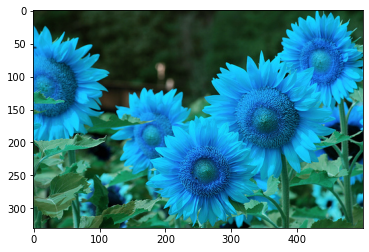

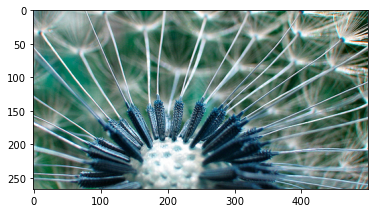

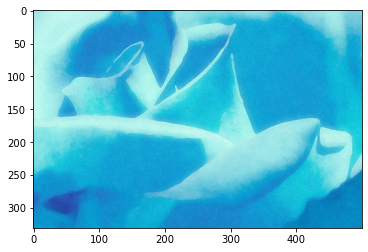

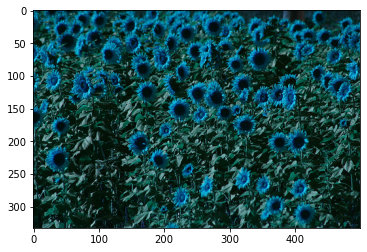

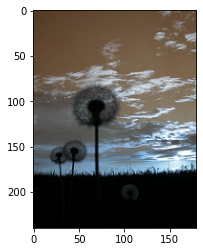

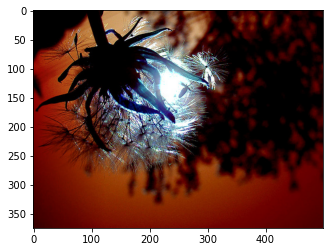

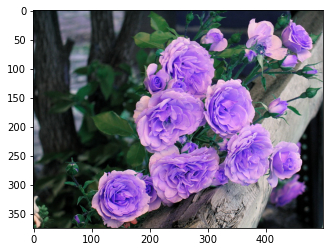

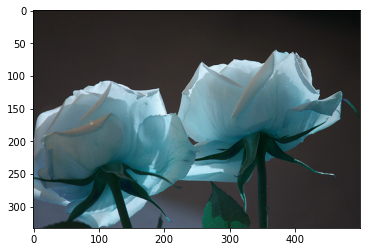

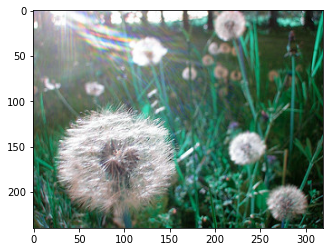

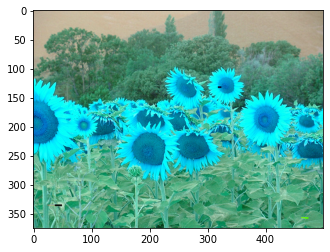

In [12]:
from matplotlib import pyplot as plt

for i in range(10):
    image = cv2.imread(train_dir[i][1])

    plt.imshow(image)
    plt.show()

In [13]:
def image_preprocess(img):

    processed_image = cv2.resize(img, (320, 240))

    processed_image = cv2.cvtColor(processed_image, cv2.COLOR_BGR2GRAY)

    processed_image = processed_image.flatten()
    
    return processed_image

In [14]:
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(320,240),
                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
                    test_dir,
                    target_size=(320,240),
                    class_mode='categorical')

TypeError: listdir: path should be string, bytes, os.PathLike or None, not list

In [64]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [65]:
def init_backprop(model):
    
    model.weight_input_hidden = np.random.normal(0, 2/input_layer, (input_layer, hidden_layer))
    
    model.bias_input_hidden = np.random.normal(0, 2/input_layer, hidden_layer)
    
    model.weight_hidden_output = np.random.normal(0, 2/hidden_layer, (hidden_layer, output_layer))
    
    model.bias_hidden_output = np.random.normal(0, 2/hidden_layer, output_layer)

In [66]:
def calc_err(label, output):
    
    return ((label - output[0])**2)/2

In [67]:
def calc_output(inputs, model):
    
    hidden_y = sigmoid(np.dot(inputs, model.weight_input_hidden) + model.bias_input_hidden)
    
    output_y = sigmoid(np.dot(hidden_y, model.weight_hidden_output) + model.bias_hidden_output)

    return output_y, hidden_y

In [68]:
def update_weight(label, input, model, learning_rate):
    output_y, hidden_y = calc_output(input, model)


    hidden_y = hidden_y.reshape((len(hidden_y), 1))
    output_y = output_y.reshape((1, len(output_y)))
    input_reshaped = input.reshape((len(input), 1))

    # Calculating Error
    output_error = calc_err(label, output_y)

    # Calculating delta theta for hidden - output
    derivative_hidden_output = (output_y - label) * output_y * (1 - output_y)
    dtheta_hidden_output = np.dot(hidden_y, derivative_hidden_output)

    # Calculating delta theta for input - hidden
    hidden_error = np.dot(model.weight_hidden_output, derivative_hidden_output.T)
    derivative_input_hidden = hidden_error * hidden_y * (1 - hidden_y)
    derivative_input_hidden = derivative_input_hidden.reshape((1, len(derivative_input_hidden)))
    dtheta_input_hidden = np.dot(input_reshaped, derivative_input_hidden)

    # update weight
    model.weight_hidden_output -= learning_rate * dtheta_hidden_output / len(train_dir)
    model.bias_hidden_output -= learning_rate * derivative_hidden_output[0] / len(train_dir)
    model.weight_input_hidden -= learning_rate * dtheta_input_hidden / len(train_dir)
    model.bias_input_hidden -= learning_rate * derivative_input_hidden[0] / len(train_dir)

    # return new sum error
    return np.sum(calc_err(label, calc_output(input, model)[0]))

In [69]:
def predict(input, model):
    output, _ = calc_output(input, model)

    return np.argmax(output)

In [70]:
def calc_accuracy(model):
    correct_count = 0
    for label, img_path in test_dir:
        img = image_preprocess(cv2.imread(img_path))
        if np.argmax(label) == predict(img, model):
            correct_count += 1
    return correct_count / len(test_dir)

In [71]:
def train(model, epoch, lr):
    errors = []
    accuracies = []
    for cur_epoch in range(epoch):
        print(cur_epoch)
        cur_error = 0
        for label, img_path in train_dir:
            img = image_preprocess(cv2.imread(img_path))
            output = calc_output(img, model)
            cur_error += calc_err(label, output)
            update_weight(label, img, model, lr)
        errors.append(sum(cur_error)/len(train_dir))
        accuracies.append(calc_accuracy(model))
    return errors, accuracies

In [72]:
import matplotlib.pyplot as plt
 
def visualize(errors, accuracies):
    plt.plot(errors, 'r-')
    plt.plot(accuracies, 'b-')
    plt.show()

0


<ipython-input-64-4fd9003ecf14>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


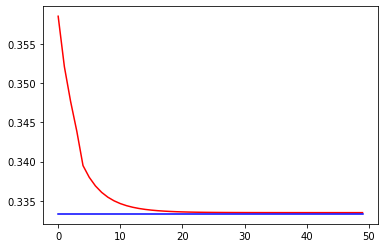

In [73]:
model1 = MLP_weight()
init_backprop(model1)
errors1, accuracies1 = train(model1, 50, 0.1)
visualize(errors1, accuracies1)

Accuracy: 0.3333333333333333
Error: 0.3334965314357245


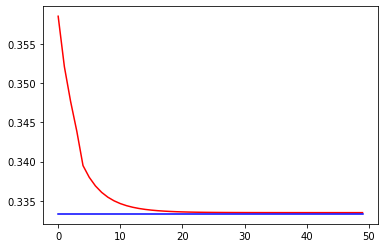

In [80]:
print("Accuracy: {}".format(accuracies1[-1]))
print("Error: {}".format(errors1[-1]))
visualize(errors1, accuracies1)

0


<ipython-input-64-4fd9003ecf14>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


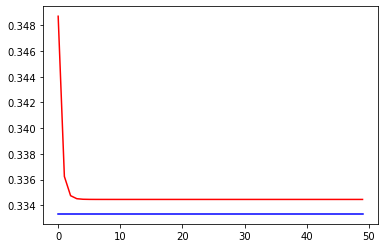

In [81]:
model2 = MLP_weight()
init_backprop(model2)
errors2, accuracies2 = train(model2, 50, 0.8)
visualize(errors2, accuracies2)

Accuracy: 0.3333333333333333
Error: 0.3344596992575374


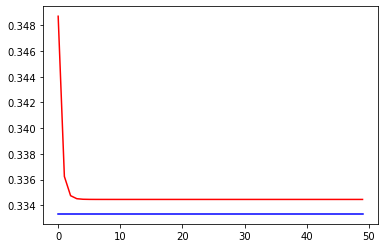

In [82]:
print("Accuracy: {}".format(accuracies2[-1]))
print("Error: {}".format(errors2[-1]))
visualize(errors2, accuracies2)